# OpenCV Projects Examples

## Simple OpenCV Project Ideas

### **Edge Detection**

It’s particularly useful for tasks like object detection, where need to distinguish different objects based on their edges.

**Key learning points:**

- **Edge Detection Algorithms**: The Canny Edge Detector is one of the most popular algorithms. It uses gradients in the image to detect edges.
- **Gradients**: The algorithm looks at how the intensity of pixels changes and uses this information to find edges.
- **Thresholding**: Edge detection often involves setting thresholds to determine which gradients should be considered as edges.

In [31]:
import cv2
import matplotlib.pyplot as plt
def show(img):
    cv2.imshow('gray scale', cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

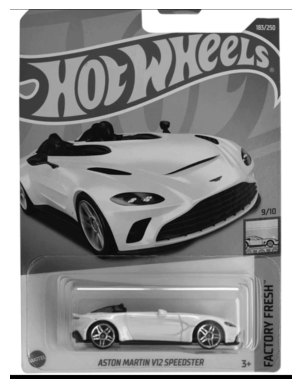

In [32]:
img = cv2.imread('./example_data/box_toy.jpg',cv2.IMREAD_GRAYSCALE)
show(img)

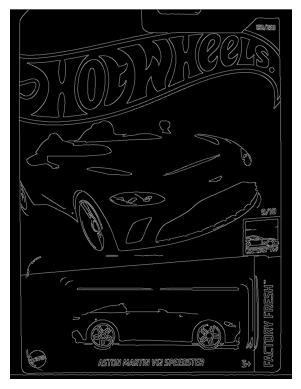

In [3]:
edges = cv2.Canny(img, threshold1=100, threshold2=200)
show(edges)

### **Straight Lines Detection**

**Probabilistic Hough Line Transform** detects line segments in an image

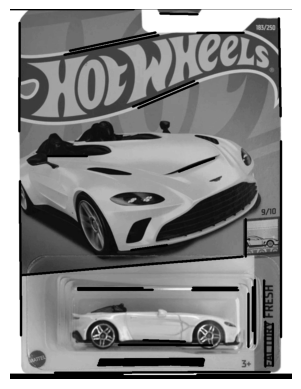

In [4]:
import numpy as np

# Define HoughLinesP parameters
rho = 1                # The distance resolution of the accumulator in pixels.
theta = np.pi / 180    # The angle resolution of the accumulator in radians
threshold = 50         # Minimum number of intersections in the Hough space to detect a line.
                       # Higher values mean fewer, but more prominent, lines will be detected.
min_line_length = 100  # Minimum line length in pixels
max_line_gap = 10      # Maximum allowed gap between points on the same line

# Detect line segments in the image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

def draw_lines(img, lines):
    if lines is None:
        return
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img=img, pt1=(x1,y1), pt2=(x2,y2), color=(0,255,0), thickness=5)

draw_lines(img, lines)
show(img)

### **Morphological Operations**

- **Erosion**: removes pixels at the boundaries of objects.
- **Dilation**: adds pixels to the boundaries. 

They’re often used together for noise reduction.

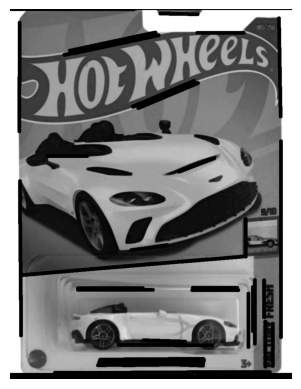

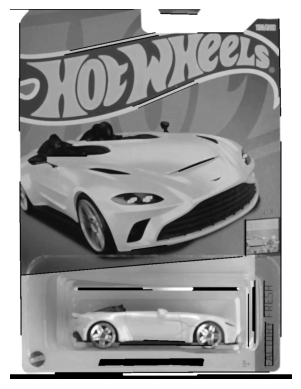

In [ ]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
show(erosion)
dilation = cv2.dilate(img, kernel, iterations=1)
show(dilation)

- **Opening**: is erosion followed by dilation, useful for removing small objects.
- **Closing**: is dilation followed by erosion, helpful in closing small holes within objects.

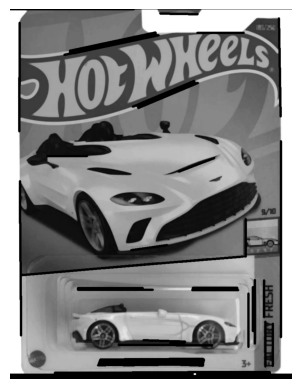

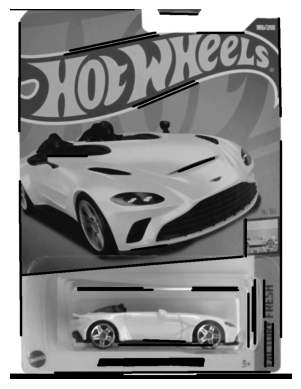

In [ ]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
show(opening)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
show(closing)

### **Corner Detection**

Corner detection is to find points in an image where the intensity changes sharply, indicating a corner or intersection.
- **Harris Corner Detector**: This method identifies corners based on local changes in intensity.

In [13]:
corners = cv2.cornerHarris(img, blockSize=2, ksize=3, k=0.04)

# Dilate corner image to enhance corner points
corners = cv2.dilate(corners, None)

print(corners)

[[ 0.    0.    0.   ... -0.01 -0.01 -0.01]
 [ 0.    0.    0.   ... -0.01 -0.01 -0.01]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]


- **Shi-Tomasi Corner Detector**: An improvement over the Harris detector, it is widely used in tracking algorithms.

C:\Users\dangc\AppData\Local\Temp\ipykernel_12408\3710957553.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


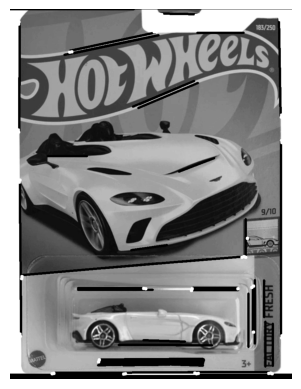

In [16]:
corners = cv2.goodFeaturesToTrack(img, maxCorners=25, qualityLevel=0.001, minDistance=10)
corners = np.int0(corners)

# Draw corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, center=(x, y), radius=5, color=255, thickness=-1)

show(img)

### **Contour Detection**

**Contours** are curves that join all the continuous points along a boundary with the same color or intensity. They are essential for identifying shapes in an image.

contour shape:  (4, 1, 2)


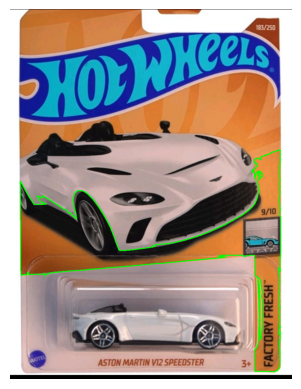

In [55]:
path = 'C:/Users/dangc/Downloads/ongoing_pj/OCR/sample_data/box_toy.jpg'
img = cv2.imread(path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarize the image
## THRESH_BINARY_INV: Inverse of THRESH_BINARY. Pixel is set to maxval if it’s below thresh; otherwise, it’s set to 0.
## cv2.THRESH_OTSU: automatically determines an optimal threshold 
## by analyzing the histogram of pixel intensities to separate foreground from background
_, thresh = cv2.threshold(src=gray_image, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in a binary image.
## cv2.RETR_TREE: Retrieves all contours and reconstructs a full hierarchy of nested contours.
## cv2.CHAIN_APPROX_SIMPLE: Stores only the endpoints of the contours (saves memory).
contours, _ = cv2.findContours(image=thresh.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
## contours: Each contour in contours is represented as a NumPy array of (x, y) coordinates.
print('contour shape: ', contours[0].shape)

# Draw the contour
## function cv2.contourArea calculates the area of a contour
max_contour = max(contours, key=cv2.contourArea)
img = cv2.drawContours(image=img, contours=[max_contour], contourIdx=-1, color=(0, 255, 0), thickness=2)

show(img)

### **Convex Hull Detection**

**Convex Hull** is the smallest convex shape that can enclose all the points in a set. It helps to identify the shape of the object.

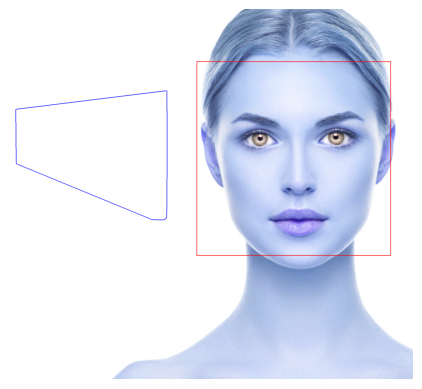

In [54]:
# Convex Hull
## returnPoints=True returns the points that form the convex hull.
## returnPoints=False returns the indices of the max_contour points that form the convex hull
hull = cv2.convexHull(max_contour, returnPoints=True)

# Draw the convex hull
img = cv2.drawContours(image=img, contours=[hull], contourIdx=-1, color=(0, 0, 255), thickness=2)
show(img)

### **Face Detection**

- **Haar Features**: Haar Cascades use features that look at the contrast between adjacent pixel groups to detect objects.

In [48]:
import requests

# Read img from website
url = 'https://www.lumierebeautyclinic.com.au/wp-content/uploads/2023/05/how-to-make-yourself-pretty-Lumiere-Beauty-Clinic-scaled.jpg'
response = requests.get(url)
img_data = np.asanyarray(bytearray(response.content), dtype='uint8')
img_data

array([255, 216, 255, ..., 171, 255, 217], dtype=uint8)

In [49]:
img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show(gray_image)

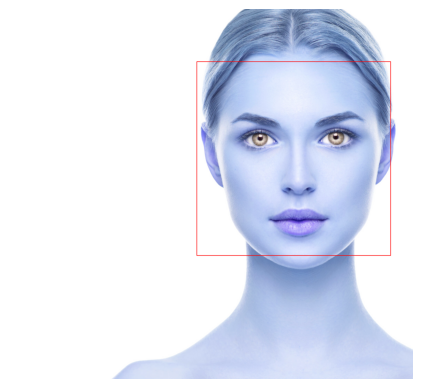

In [53]:
# Detect faces using the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

show(img)

### **Camera Pose Estimation**

**camera pose estimation** determines the position and orientation of an object in 3D space relative to the camera; by solving the Perspective-n-Point (PnP) problem, where it estimates the transformation (rotation and translation) required to map 3D points in the world to 2D points in an image.


**Python Function Signature**

```python
retval, rvec, tvec = cv2.solvePnP(objectPoints, imagePoints, cameraMatrix, distCoeffs, rvec, tvec, useExtrinsicGuess, flags)
```

**Parameters**

1. **objectPoints**: An array of 3D points in the world coordinate space. It should be of shape `(N, 3)`, where $N$ is the number of points.

2. **imagePoints**: An array of 2D points in the image plane that correspond to the 3D points. It should be of shape `(N, 2)`.

3. **cameraMatrix**: The intrinsic camera matrix, which contains information about the focal length and optical center of the camera. It’s typically obtained from camera calibration and has the form:
   $$
   \text{cameraMatrix} = \begin{bmatrix} f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{bmatrix}
   $$
   where $f_x$ and $f_y$ are the focal lengths in the x and y directions, and $c_x$ and $c_y$ are the coordinates of the optical center.

4. **distCoeffs**: The distortion coefficients of the camera, usually obtained from camera calibration. It’s an array of shape `(4, 1)` or `(5, 1)`, depending on whether you're correcting for radial and/or tangential distortion.

5. **rvec** (optional): An initial estimate for the rotation vector. It’s used if you want to provide an initial guess (especially useful if you're refining a previous solution).

6. **tvec** (optional): An initial estimate for the translation vector.

7. **useExtrinsicGuess** (optional): A boolean flag to indicate if the initial `rvec` and `tvec` should be used as a starting point for the iterative algorithm.

8. **flags** (optional): Specifies the PnP solving algorithm. Options include:
   - `cv2.SOLVEPNP_ITERATIVE` (default): A standard iterative algorithm.
   - `cv2.SOLVEPNP_P3P`: Requires exactly four points and is faster but less accurate.
   - `cv2.SOLVEPNP_AP3P`: Another variant of P3P with different constraints.
   - `cv2.SOLVEPNP_EPNP`: Efficient PnP that works with larger sets of points but is less accurate.
   - `cv2.SOLVEPNP_DLS` or `cv2.SOLVEPNP_UPNP`: Advanced methods for specific cases.

**Returns**

- **retval**: A boolean indicating whether the solution was found.
- **rvec**: The rotation vector, representing the orientation of the object relative to the camera. This vector can be converted to a rotation matrix with `cv2.Rodrigues`.
- **tvec**: The translation vector, representing the position of the object relative to the camera in 3D space.

In [41]:
import cv2
import numpy as np

# Define 3D object points in the world (for example, the corners of a square on the ground)
object_points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0]
], dtype=np.float32)

# Corresponding 2D image points in pixels
image_points = np.array([
    [322, 230],
    [400, 230],
    [400, 310],
    [322, 310]
], dtype=np.float32)

# Camera intrinsic parameters (example values)
camera_matrix = np.array([
    [800, 0, 320],
    [0, 800, 240],
    [0, 0, 1]
], dtype=np.float32)

# Assuming no distortion
dist_coeffs = np.zeros((4, 1), dtype=np.float32)

# Solve for rotation and translation vectors
retval, rvec, tvec = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs)

# Convert the rotation vector to a rotation matrix (optional)
rotation_matrix, _ = cv2.Rodrigues(rvec)

# Project 3D points to 2D image plane
image_points, jacobian = cv2.projectPoints(object_points, rvec, tvec, camera_matrix, dist_coeffs)
## The Jacobian matrix describes the partial derivatives of the projected points with respect to each parameter.
## It’s typically used for optimization.

print("Rotation Matrix:\n", rotation_matrix)
print("Translation Vector:\n", tvec)
print("Projected 2D points:\n", image_points)

Rotation Matrix:
 [[ 0.98751468 -0.00154922 -0.15751936]
 [ 0.00572493  0.99964401  0.02605895]
 [ 0.15742292 -0.02663538  0.98717201]]
Translation Vector:
 [[ 0.02472907]
 [-0.12735441]
 [ 9.96113758]]
Projected 2D points:
 [[[321.98605 229.7719 ]]

 [[400.03064 230.38365]]

 [[400.11908 309.60135]]

 [[321.8666  310.24326]]]


### **Standardize The Low Quality Image**

#### Generate low quality image

Rotate, blur, bring to gray scale, change the brightness and contrast of an image randomly.

In [39]:
import cv2
import numpy as np
import random

def show_color(image):
    cv2.imshow('', cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image = cv2.imread('./example_data/box_toy.jpg')

In [40]:
# 1. Random Rotation
angle = random.randint(-90, 90)
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
transformation_matrix = cv2.getRotationMatrix2D(center, angle, scale=0.8)
print(transformation_matrix)
rotated_image = cv2.warpAffine(image, transformation_matrix, (w, h))

show_color(rotated_image)

[[  0.7517541   -0.27361611 252.66469441]
 [  0.27361611   0.7517541   21.71795954]]


**Transformation Matrix (`M`)**:
The transformation matrix `M` is a 2×3 matrix in the form:

$$
M =
\begin{bmatrix}
a & b & tx \\
c & d & ty
\end{bmatrix}
$$

- `(a, b, c, d)` control rotation, scaling, and shearing.
- `(tx, ty)` control translation (shifting).

In [43]:
# 2. Random Blur
if random.random() > 0.5:  # Apply blur with 50% probability
    ksize = random.choice([3, 5, 7])  # Kernel size: 3x3, 5x5, or 7x7
    blurred_image = cv2.GaussianBlur(rotated_image, (ksize, ksize), 0)
else:
    blurred_image = rotated_image

show_color(blurred_image)

In [44]:
# 3. Random Grayscale Conversion
if random.random() > 0.5:  # Convert to grayscale with 50% probability
    grayscale_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)  # Convert back to 3 channels
else:
    grayscale_image = blurred_image

show_color(grayscale_image)

In [46]:
# 4. Random Brightness Adjustment
brightness_factor = random.uniform(0.5, 1.5)  # Scale brightness
brightness_adjusted = np.clip(grayscale_image * brightness_factor, 0, 255).astype(np.uint8)

show_color(brightness_adjusted)

In [47]:
# 5. Random Contrast Adjustment
contrast_factor = random.uniform(0.5, 1.5)  # Scale contrast
mean = np.mean(brightness_adjusted, axis=(0, 1))
contrast_adjusted = np.clip((brightness_adjusted - mean) * contrast_factor + mean, 0, 255).astype(np.uint8)

show_color(contrast_adjusted)

In [48]:
cv2.imwrite("./example_data/transformed_image.jpg", contrast_adjusted)

True

#### Quality Recovery

##### **SIFT** for Rotation and Scaling

In [60]:
import matplotlib.pyplot as plt
import os

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_COLOR)

def detect_and_compute_keypoints(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

def match_keypoints(descriptors1, descriptors2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    return good_matches

# Metrics and plots
def plot_matches(img1, img2, kp1, kp2, matches, path_save_plot):
    matched_image = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(matched_image)
    plt.title("SIFT Feature Matching - number matches " + str(len(matches)))
    plt.savefig(path_save_plot)

def get_matched_points(keypoints1, keypoints2, matches):
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    return points1, points2

def compute_homography(points1, points2):
    h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
    return h

def warp_image(image, h, shape):
    height, width = shape[:2]
    warped_image = cv2.warpPerspective(image, h, (width, height))
    return warped_image

Number of keypoints in the original image: 1625
Number of keypoints in the rotated image: 748
Number of good matches: 426


True

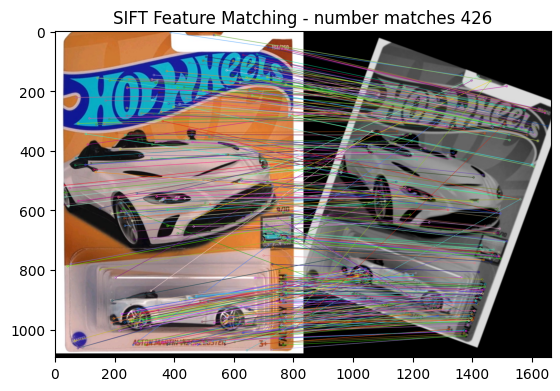

In [61]:
path_standard_image = './example_data/box_toy.jpg'
dir_aligned_images = './example_data/'
path_modified_image = './example_data/transformed_image.jpg'

file_mod_image = path_modified_image.split("/")[-1]
name_mod_image = file_mod_image.split(".")[0]
path_save_plot = os.path.join(dir_aligned_images, name_mod_image + "_matches.png")
path_save_aligned_image = os.path.join(dir_aligned_images, name_mod_image + "_SIFT.png")

# Load images
image1 = load_image(path_standard_image)
image2 = load_image(path_modified_image)

# Find keypoints and descriptors
keypoints1, descriptors1 = detect_and_compute_keypoints(image1)
keypoints2, descriptors2 = detect_and_compute_keypoints(image2)

# Matching keypoints
matches = match_keypoints(descriptors1, descriptors2)

print(f"Number of keypoints in the original image: {len(keypoints1)}")
print(f"Number of keypoints in the rotated image: {len(keypoints2)}")
print(f"Number of good matches: {len(matches)}")

# Plot matching
plot_matches(image1, image2, keypoints1, keypoints2, matches, path_save_plot)

# Extract correspondences
points1, points2 = get_matched_points(keypoints1, keypoints2, matches)

# Calculate homography
h = compute_homography(points1, points2)

# Rotation and transformation of the second image
aligned_image2 = warp_image(image2, h, image1.shape)

# Save the second image
cv2.imwrite(path_save_aligned_image, aligned_image2)

##### **Laplacian** for [Blur Removal](https://pyimagesearch.com/2015/09/07/blur-detection-with-opencv/)

In [ ]:
import os
# if the amount of blur is over the threshold, remove the blur.
threshold = 100

def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	return cv2.Laplacian(gray, cv2.CV_64F).var()

def unblur(image):
	# Create the sharpening kernel
	kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
	# Sharpen the image
	unblur_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)
	return unblur_image

In [ ]:
path_blur_image = './example_data/transformed_image_SIFT.png'
dir_unblurred_image = './example_data/'
file_image = path_blur_image.split("/")[-1]

# load the image
image = cv2.imread(path_blur_image)

# loop until focus measure is bigger then the threshold
iter = 0
while variance_of_laplacian(image) <= threshold:
    # unblur the image
    image = unblur(image)
    iter += 1

# Save the image
print("iter: {} - focus measure: {}".format(iter, variance_of_laplacian(image)))
path_unblurred_image = os.path.join(dir_unblurred_image, 'transformed_image_unblurred.png')
cv2.imwrite(path_unblurred_image, image)

iter: 1 - fm: 425.7847800076373


True

##### Contrast and Brightness Adjustment

In [ ]:
def calculate_brightness_and_contrast(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate brightness (mean)
    brightness = np.mean(gray)
    # Calculate contrast (standard deviation)
    contrast = np.std(gray)
    return brightness, contrast

def adjust_brightness_and_contrast(image, target_brightness, target_contrast):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate current brightness and contrast
    current_brightness, current_contrast = calculate_brightness_and_contrast(image)

    # Calculate scaling factor and offset
    if current_contrast != 0:
        scaling_factor = target_contrast / current_contrast
    else:
        scaling_factor = 1

    offset = target_brightness - scaling_factor * current_brightness

    # Adjust brightness and contrast
    adjusted_image = cv2.convertScaleAbs(image, alpha=scaling_factor, beta=offset)

    return adjusted_image

In [73]:
path_test_image = './example_data/transformed_image_unblurred.png'
path_standard_image = './example_data/box_toy.jpg'
dir_clean_image = './example_data/'
file_image = 'transformed_image_bright.png'

# Load the images
standard_image = cv2.imread(path_standard_image)
image_to_adjust = cv2.imread(path_test_image)

# Calculate brightness and contrast of the standard image
standard_brightness, standard_contrast = calculate_brightness_and_contrast(standard_image)

# Adjust the second image
adjusted_image = adjust_brightness_and_contrast(image_to_adjust, standard_brightness, standard_contrast)

# Save the adjusted image
cv2.imwrite(os.path.join(dir_clean_image, file_image), adjusted_image)

True

## OpenCV Projects

### **Object Tracking**

#### 1. Tracking the selected object

- **CamShift and Meanshift**: base on object's color and shape. 
    - Meanshift helps in finding the centroid of a mass in an image.
    - CamShift (Continuously Adaptive Meanshift) adapts the search window size and rotation as the object moves.
- **Kalman Filter**: is used to predict the position of an object in subsequent frames based on its velocity and direction.

In [21]:
# Load a video
path = './balls-moving.mp4'
cap = cv2.VideoCapture(path)

# Get the width and height of the frame
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Read the first frame of the video
ret, frame = cap.read()

# Set up the initial location of the window
## Select the ROI (Region of Interest) for the object you want to track
frame = cv2.resize(frame, (int(width * 0.5), int(height * 0.5))) # resize to avoid a zoomed in video
roi = cv2.selectROI("Select ROI", frame, fromCenter=False, showCrosshair=True)
x, y, w, h = roi

# x, y, w, h = 0, 100, 100, 100  # Hardcoded initial window
track_window = (x, y, w, h)

# Set up the Region of Interest (ROI) for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
# show(hsv_roi)

# cv2.inRange() creates a binary mask where 
# pixels within the specified color range are set to 255 (white), 
# and pixels outside the range are set to 0 (black).
mask = cv2.inRange(hsv_roi, lowerb=np.array((0, 60, 32)), upperb=np.array((180, 255, 255)))
# print(mask)

roi_hist = cv2.calcHist(images=[hsv_roi], channels=[0], mask=mask, histSize=[180], ranges=[0, 180])
clipped_roi_hist = cv2.normalize(src=roi_hist, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Set up the termination criteria: either 10 iterations or move by at least 1 pt
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if ret:
        # resize to avoid a zoomed in video
        frame = cv2.resize(frame, (int(width * 0.5), int(height * 0.5)))
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # create a probability map (dst) based on the color distribution from roi_hist.
        dst = cv2.calcBackProject(images=[hsv], channels=[0], hist=roi_hist, ranges=[0, 180], scale=1)

        # apply CamShift to get new location
        ret, track_window = cv2.CamShift(probImage=dst, window=track_window, criteria=term_crit)

        # converts the result to a set of points to draw a rotated rectangle on the video
        pts = cv2.boxPoints(ret) # Get the four corner points of the rotated rectangle
        pts = np.intp(pts) # Convert to integer
        img2 = cv2.polylines(img=frame, pts=[pts], isClosed=True, color=255, thickness=2)
        # img2 = cv2.resize(img2, (int(width * 0.5), int(height * 0.5))) # resize to avoid a zoomed in video
        cv2.imshow('Object Tracking', img2)

        if cv2.waitKey(30) & 0xFF == 27: break
    else: break

cap.release()
cv2.destroyAllWindows()

#### 2. Tracking all objects

In [23]:
cap = cv2.VideoCapture(path)  # Replace "video.mp4" with 0 for webcam

# Get the width and height of the frame
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=25, detectShadows=True)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = cv2.resize(frame, (int(width * 0.5), int(height * 0.5))) # resize to avoid a zoomed in video
        
    # Apply background subtraction
    fgmask = fgbg.apply(frame)
    
    # Remove noise and small objects from the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    # Find contours of the moving objects
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        # Filter out small objects based on contour area
        if cv2.contourArea(cnt) > 500:
            # Draw bounding box around the moving object
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # cv2.putText(frame, "Moving Object", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
        # Display the original frame with the bounding box
        cv2.imshow("Object Tracking", frame)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

### **Hand Gesture Recognition**

- **Machine Learning Integration**: classifies the gestures based on the contours and hulls detected.

In [26]:
# Load the video feed from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    if not ret:
        break

    # Convert the frame to grayscale and 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # apply Gaussian filter to blur the image by reducing noise and detail.
    kernel_size = (35,35) # the area over which the Gaussian average is calculated; a larger kernel size leads to a greater blur.
    blurred = cv2.GaussianBlur(src=gray, ksize=kernel_size, sigmaX=0)
    # cv2.imshow('test blurred cam', blurred)

    # Threshold the image
    _, thresh = cv2.threshold(src=blurred, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(image=thresh.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        # Find the largest contour
        max_contour = max(contours, key=cv2.contourArea)

        # Draw the contour
        cv2.drawContours(image=frame, contours=[max_contour], contourIdx=-1, color=(0, 255, 0), thickness=2)

        # Convex Hull
        hull = cv2.convexHull(max_contour)

        # Draw the convex hull
        cv2.drawContours(image=frame, contours=[hull], contourIdx=-1, color=(0, 0, 255), thickness=2)

    cv2.imshow('Hand Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): break

cap.release()
cv2.destroyAllWindows()

### **Lane Detection for Self-Driving Cars**

- **Hough Transform**: is used to detect straight lines in an image.
- **Masking**: is essential to focus on the region of interest (e.g., the road) while ignoring irrelevant parts of the image.
- **Perspective Transformations**: Adjusting the perspective of the image helps in correctly identifying lanes, especially on curved roads.

In [28]:
import cv2
import numpy as np

def RoI(img, vertices): # color the RoI
    mask = np.zeros_like(img)
    cv2.fillPoly(img=mask, pts=vertices, color=255)
    masked = cv2.bitwise_and(img, mask)
    return masked

def draw_lines(img, lines):
    if lines is None:
        return
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img=img, pt1=(x1,y1), pt2=(x2,y2), color=(0,255,0), thickness=5)

onl_path = 'https://mazwai.com/videvo_files/video/free/2014-11/small_watermarked/matt_devir--one_minute_drive_preview.webm'
offl_path = './driving.mp4'
cap = cv2.VideoCapture(offl_path)

# Get the width and height of the frame
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret, frame = cap.read()
    # frame = cv2.resize(frame, (int(width * 0.5), int(height * 0.5))) # resize to avoid a zoomed in video

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    # Define the region of interest
    height = frame.shape[0]
    width = frame.shape[1]
    vertices = np.array([[(100, height), (width//2 - 50, height//2 + 50), 
                          (width//2 + 50, height//2 + 50), (width-100, height)]], 
                        dtype=np.int32)
    roi = RoI(edges, vertices)

    # Hough Transform to detect lines
    lines = cv2.HoughLinesP(roi, 1, np.pi/180, 100, minLineLength=40, maxLineGap=5)
    line_img = np.zeros_like(frame)
    draw_lines(line_img, lines)

    # Combine the original frame with the line image
    combo = cv2.addWeighted(frame, 0.8, line_img, 1, 0)
    
    cv2.imshow('Lane Detection', combo)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### **Augmented Reality (AR) with OpenCV**

AR is a cutting-edge technology that overlays virtual objects onto the real world. Using OpenCV to track a real-world object and places 3D models on top of it.

- **Homography**: is a transformation that maps the points in one plane to another. It’s crucial for accurately placing virtual objects in the correct position relative to the real world.
- **Perspective Transformations**: adjust the image perspective, helping align virtual objects with real-world objects.
- **3D Object Rendering**: render 3D objects and overlay them onto a live camera feed, creating an AR effect.

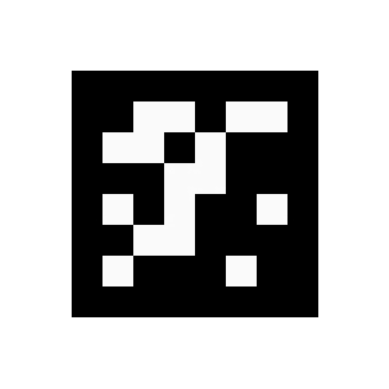

In [52]:
import cv2
import numpy as np
import requests

# Load the marker image and start the camera
path = 'https://i.sstatic.net/kdqSZ.jpg'
response = requests.get(path)
img_data = np.asanyarray(bytearray(response.content), dtype='uint8')
marker = cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)
show(marker)

- **Marker images** (or AR markers) serve as reference points that the AR system can recognize and track to anchor digital content in the physical world. These images typically look like QR codes or high-contrast patterns, and the AR app detects and identifies them through the camera.
- **SIFT (Scale-Invariant Feature Transform)** object detects and computes distinctive, scale-invariant features in an image. SIFT is robust to changes in scale, rotation, and even some degree of perspective distortion.
    - **Keypoint Detection**: The SIFT algorithm identifies "keypoints" in an image, which are points of interest that stand out in terms of contrast, edges, or other unique features.
    - **Descriptor Computation**: For each keypoint, SIFT computes a descriptor — a vector that characterizes the keypoint’s appearance in a way that is stable under different scales and rotations. This descriptor enables matching of the same point across different images.
    - These **keypoints** and **descriptors** can be used to match similar features across images.

In [31]:
cap = cv2.VideoCapture(0)

# Define 3D points for a simple cube
cube_points = np.float32([[0, 0, 0], [0, 3, 0], [3, 3, 0], [3, 0, 0], [0, 0, -3], [0, 3, -3], [3, 3, -3], [3, 0, -3]])

# Define a dummy camera matrix and no distortion for testing
camera_matrix = np.array([[800, 0, 320], [0, 800, 240], [0, 0, 1]], dtype="double")
dist_coeffs = np.zeros((4, 1))  # Assuming no distortion

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(marker, None)
    kp2, des2 = sift.detectAndCompute(gray_frame, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Proceed only if enough matches are found
    if len(matches) > 10:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
        matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Draw a box around the detected marker
        h, w = marker.shape
        pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, matrix)
        frame = cv2.polylines(frame, [np.int32(dst)], True, 255, 3)
        ## cv2.perspectiveTransform() applies a perspective transformation to a set of 2D points. 
        ## This transformation is typically defined by a 3x3 homography matrix,
        ## allowing you to map points from one plane to another under a perspective transformation.

        # 3D-2D points mapping for solvePnP
        image_points = np.array(dst).reshape(-1, 2)
        object_points = cube_points[:4]  # Ensure only 4 points for solvePnP

        # SolvePnP to find rotation and translation vectors
        retval, rvecs, tvecs = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs)
    
        # Define cube edges for 3D projection and overlay
        axis = np.float32([[3, 3, 0], [6, 3, 0], [6, 6, 0], [3, 6, 0], [3, 3, -3], [6, 3, -3], [6, 6, -3], [3, 6, -3]])
        imgpts, _ = cv2.projectPoints(axis, rvecs, tvecs, camera_matrix, dist_coeffs)
        imgpts = np.int32(imgpts).reshape(-1, 2)
        
        # Draw the cube using line segments
        for i, j in zip([0, 1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 0, 5, 6, 7, 4]):
            frame = cv2.line(frame, tuple(imgpts[i]), tuple(imgpts[j]), (0, 0, 255), 3)
        for i, j in zip([0, 4, 1, 5, 2, 6, 3, 7], [4, 0, 5, 1, 6, 2, 7, 3]):
            frame = cv2.line(frame, tuple(imgpts[i]), tuple(imgpts[j]), (0, 255, 0), 3)

    cv2.imshow('Augmented Reality', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Reference

[OpenCV Projects Examples](https://medium.com/@amit25173/opencv-projects-examples-with-code-2de3df77f208)

[Exploring the Microsoft Phi3 Vision Language model as OCR for document data extraction-part 2 (computer vision techniques to clean documents)](https://medium.com/@enrico.randellini/exploring-the-microsoft-phi3-vision-language-model-as-ocr-for-document-data-extraction-part-2-904f6e1b9b2d)